In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Imports 


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Preprocessing 

In [14]:
# Importing the dataset
data = pd.read_csv("/kaggle/input/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
data = data.drop(["customerID"], axis = 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Note:
we can't see total charges in the discription but in head we can se it should be float 

In [18]:

a = data[data["TotalCharges"]==" "]
pd.set_option('display.max_columns', None)
a

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### We can see that "tenure" and "TotalCharges" are zero.

If both "tenure" and "TotalCharges" are zero, it could indicate a couple of scenarios, depending on the context of the dataset:

New Customer or Starting Point: For "tenure" being zero, it might mean that the customer is relatively new and has just started using the service. The value of "TotalCharges" being zero could imply that the customer has not incurred any charges yet, perhaps because they are on a free trial or haven't made any purchases.

We have not used mean / median to fill it because if tenure is zero then it has not began or under 1 month - free plan

In [19]:
data = data[~data['TotalCharges'].str.contains(' ')]
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')

# Exploratory Data Analysis (EDA)

Let's begin by visualizing churn. A common question that arises is, 'What is churn?' Simply put, ***it is the rate at which customers cease doing business with an entity***. Churn is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a specified time period.

<Axes: ylabel='count'>

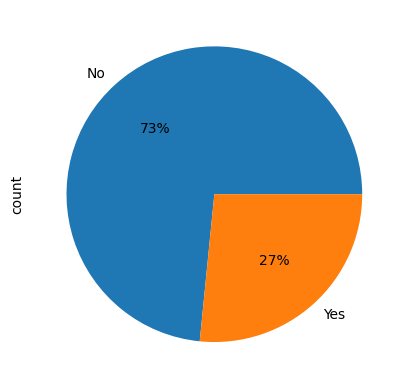

In [20]:
data["Churn"].value_counts().plot(kind="pie",autopct='%1.0f%%')

#### Here I have chosen to focus on the distribution of monthly payment and tenure for plotting, as these are the only features with numerical variability (int/float) in contrast to the other features, which predominantly present binary or categorical options

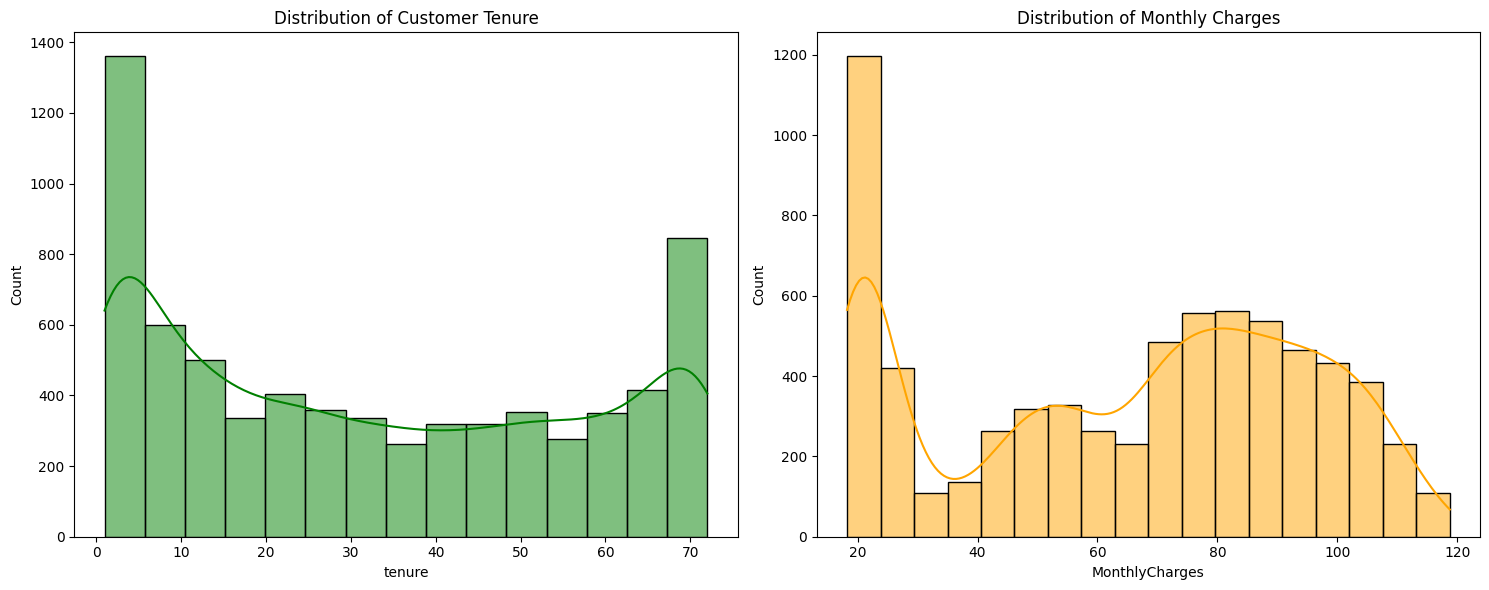

In [21]:
plt.figure(figsize=(15, 6))

# Creating a 1x2 subplot structure
plt.subplot(1, 2, 1)
sns.histplot(data['tenure'], kde=True, color='green')
plt.title('Distribution of Customer Tenure')

plt.subplot(1, 2, 2)
sns.histplot(data['MonthlyCharges'], kde=True, color='orange')
plt.title('Distribution of Monthly Charges')

plt.tight_layout()
plt.show()

### Customer Tenure Distribution:
* The histogram of customer tenure has two distinct peaks(bi-modal).
* A significant portion of customers has very low tenure (around 1-5 months), suggesting a high turnover of new customers.
* Another prominent peak is observed at the higher end of the tenure scale (around 70 months), indicating a strong and loyal customer base.
* The bi-modal nature suggests the presence of both new and long-term customers, contributing to the overall diversity in tenure.


### Monthly Charges Distribution:

* The histogram of monthly charges displays a wide distribution, indicating variability in customer billing amounts.
* A noticeable peak is observed at the lower end of charges (around 20), suggesting a substantial segment of customers with basic and lower-cost services.
* Another concentration of customers is observed at higher charges (around 70-90), possibly indicating customers with more comprehensive service plans or higher-tier services.
* The diverse distribution highlights the range of pricing options and service plans offered to customers.

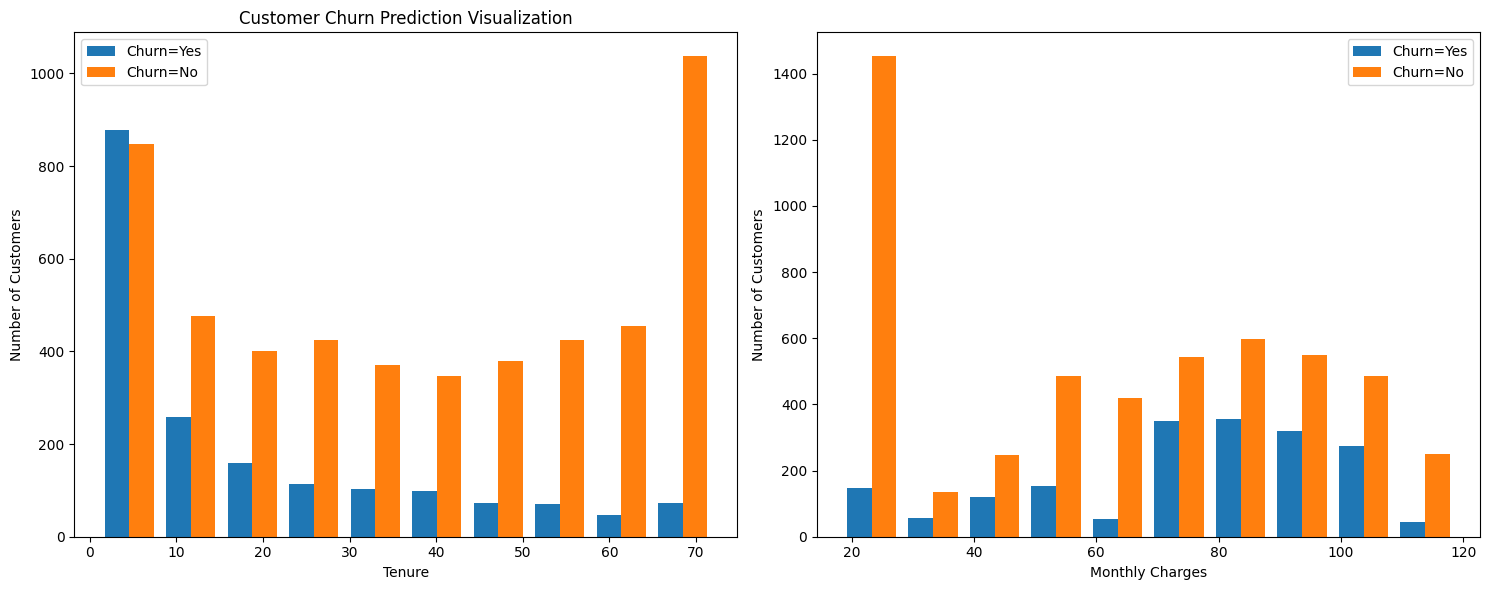

In [22]:
# Extract data for Churn = 'No' and Churn = 'Yes'
monthly_churn_no = data[data.Churn == 'No'].MonthlyCharges
monthly_churn_yes = data[data.Churn == 'Yes'].MonthlyCharges

tenure_churn_no = data[data.Churn == 'No'].tenure
tenure_churn_yes = data[data.Churn == 'Yes'].tenure

# Create a subplot with two sets of bars side by side
plt.figure(figsize=(15, 6))

# Plot Tenure histograms side by side
plt.subplot(1, 2, 1)
plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn=Yes', 'Churn=No'])
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.legend()

# Plot Monthly Charges histograms side by side
plt.subplot(1, 2, 2)
plt.hist([monthly_churn_yes, monthly_churn_no], label=['Churn=Yes', 'Churn=No'])
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.legend()



# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

- Customers with lower tenure (0-12 months) have a higher churn rate. As tenure increases, the churn rate decreases significantly. This indicates that customers are more likely to leave within the first year of their subscription, and those who stay longer are less likely to churn.

- The distribution of 'Churn vs Monthly Charges' is diverse, highlighting the range of pricing options and service plans offered to customers. A noticeable peak is observed at the lower end, suggesting a substantial segment of customers with basic and lower-cost services.

In [23]:
cat_cols = ['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 
 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(4, 4, figsize=(20, 18), dpi=500)
axes = axes.flatten()
fig.suptitle("Churn by Category", fontsize=25, fontweight="bold", y=1)

for i, col in enumerate(cat_cols):
    ax = axes[i]
    sns.countplot(data=data, x=col, hue="Churn", ax=ax)
    ax.legend(frameon=True, facecolor="inherit", shadow=True)
    ax.set_title(f"Churn vs {col}", fontsize=13)
    plt.tight_layout(pad=0.6)

    for i in ax.containers:
        ax.bar_label(i, fontsize=13)
plt.delaxes(ax=axes[-1])
plt.tight_layout()


* We can omit the "Gender" feature as it doesn't seem to make much difference in the churn rate.

* Internet Service : Customers subscribed to fiber optic internet service frequently exhibit higher churn rates in comparison to those with DSL or no internet. This phenomenon may be attributed to elevated expectations or potential service issues associated with high-speed internet.

* Providing services( tech support , data protection, online backup and online security)  reduces churn by a significant factor, even if it's for a portion of the user base.

* Payment Methods : The churn rate exhibits variability based on payment methods. Specifically, customers utilizing electronic checks may experience higher churn rates compared to those employing automated payment methods like bank transfers or credit cards. This discrepancy may be associated with factors such as convenience and perceived security of the payment method.

> ### Note: we can find out the order according to the counts of features for label encoding ( features need to ordinal to label encoded)

In [24]:
unique_elements = {}
for col in data.columns:
    unique_elements[col] = data[col].unique()

# Print or use unique_elements dictionary as needed
for col, elements in unique_elements.items():
    print(f"Unique elements in '{col}': {elements}")

Unique elements in 'gender': ['Female' 'Male']
Unique elements in 'SeniorCitizen': [0 1]
Unique elements in 'Partner': ['Yes' 'No']
Unique elements in 'Dependents': ['No' 'Yes']
Unique elements in 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Unique elements in 'PhoneService': ['No' 'Yes']
Unique elements in 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique elements in 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique elements in 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique elements in 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique elements in 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique elements in 'TechSupport': ['No' 'Yes' 'No internet service']
Unique elements in 'StreamingTV': ['No' 'Yes' 'No internet service']
Unique elements in 'StreamingMovies': 

# Feature Extration / Engineering 

Some of the feature engineering steps have been done earlier in preprocessing . Where we check for missing values in TotalCharges , fixed its type to numerical and droped "Customer ID".

### Data Scaling 

In [25]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization

data['tenure'] = mms.fit_transform(data[['tenure']])
data['MonthlyCharges'] = mms.fit_transform(data[['MonthlyCharges']])
data['TotalCharges'] = mms.fit_transform(data[['TotalCharges']])

In machine learning, models do not inherently comprehend the units associated with feature values. Instead, they interpret inputs as numerical values without grasping their actual significance. To address this limitation and ensure proper model performance, it is essential to scale the data, allowing for consistent interpretation and comparison of feature magnitudes.(Normalization is done for features whose data does not display normal distribution)

In [26]:
columns_to_encode = ['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 
 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',"Churn"]
# Apply label encoding to selected columns
ldata = data.copy()
label_encoder = LabelEncoder()

for column in columns_to_encode:
    ldata[column] = label_encoder.fit_transform(data[column])


In [27]:
ldata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


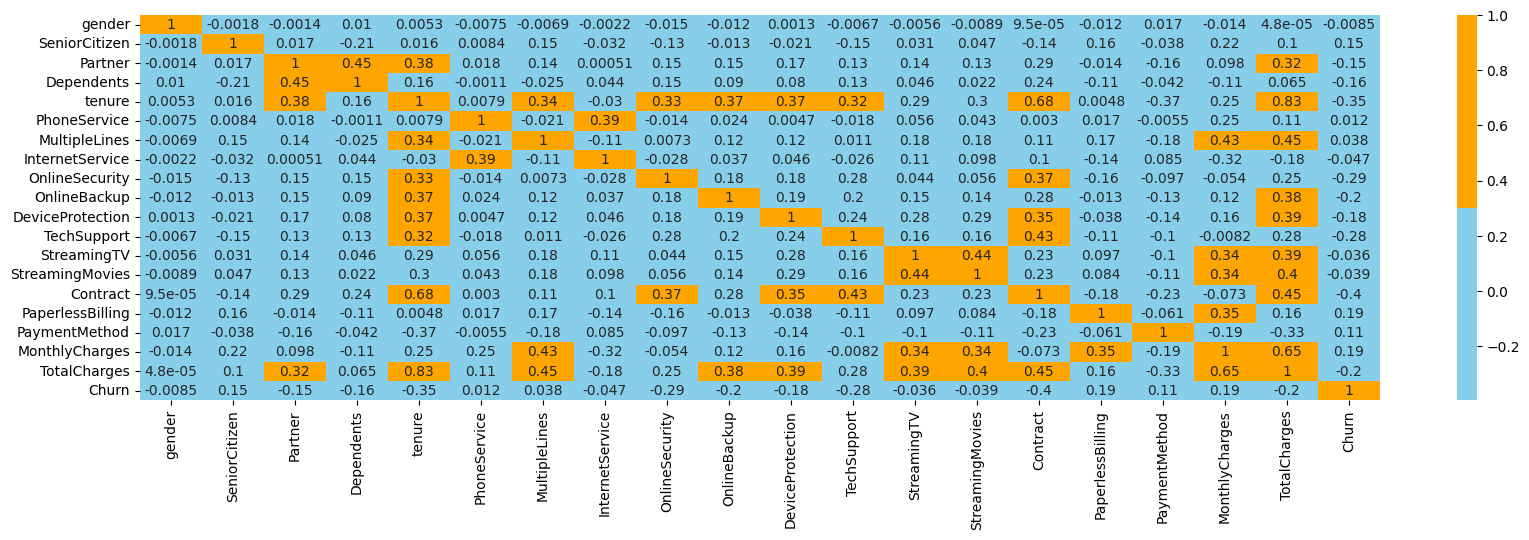

In [28]:
plt.figure(figsize = (20,5))
sns.heatmap(ldata.corr(),cmap = ["skyblue","orange"],annot = True);

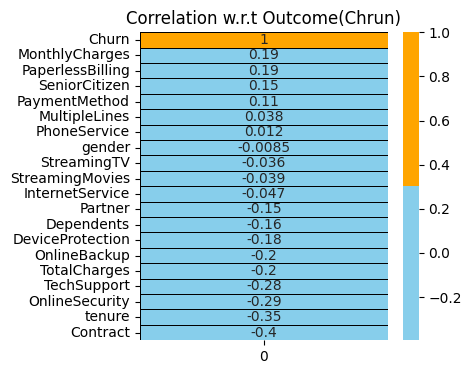

In [29]:
corr = ldata.corrwith(ldata['Churn']).sort_values(ascending = False).to_frame()

plt.subplots(figsize = (4,4))
sns.heatmap(corr,annot = True,cmap = ["skyblue","orange"],linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome(Chrun)');

* We did the correlation just for churn because the whole matrix has too many values and not very clear . But here we can see clearly see "MultipleLines","PhoneService","gender","StreamingTV","StreamingMovies" , "InternetService" not display any kind of correlation. We drop the features with correlation coefficient between (-0.1,0.1).

* Remaining features either display a significant positive or negative correlation.

In [30]:
ldata = ldata.drop(["MultipleLines","PhoneService","gender","StreamingTV","StreamingMovies" , "InternetService"],axis =1)


In [31]:
ldata.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.000000,0,2,0,0,0,1,2,0.115423,0.001275,0
1,0,0,0,0.464789,2,0,2,0,1,0,3,0.385075,0.215867,0
2,0,0,0,0.014085,2,2,0,0,0,1,3,0.354229,0.010310,1
3,0,0,0,0.619718,2,0,2,2,1,0,0,0.239303,0.210241,0
4,0,0,0,0.014085,0,0,0,0,0,1,2,0.521891,0.015330,1


### Note : We know our data is unbalanced and to tackle that we can use many different techniques , but here I am going to use SMOTE (Synthetic Minority Oversampling Technique) to campare the results with just the 

In [32]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Partner           7032 non-null   int64  
 2   Dependents        7032 non-null   int64  
 3   tenure            7032 non-null   float64
 4   OnlineSecurity    7032 non-null   int64  
 5   OnlineBackup      7032 non-null   int64  
 6   DeviceProtection  7032 non-null   int64  
 7   TechSupport       7032 non-null   int64  
 8   Contract          7032 non-null   int64  
 9   PaperlessBilling  7032 non-null   int64  
 10  PaymentMethod     7032 non-null   int64  
 11  MonthlyCharges    7032 non-null   float64
 12  TotalCharges      7032 non-null   float64
 13  Churn             7032 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 824.1 KB


In [33]:
!pip install -U imbalanced-learn

In [34]:
x = ldata.iloc[:,:13]
y = ldata.iloc[:,13]

In [35]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smt = SMOTE()
print("before",Counter(y))
x_smt,y_smt = smt.fit_resample(x,y)
print("after",Counter(y_smt))

before Counter({0: 5163, 1: 1869})
after Counter({0: 5163, 1: 5163})


# Modeling 


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_smt, y_smt, test_size = 0.20, random_state = 2)

In [37]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt



In [38]:
def train_model(classifier, x_train, y_train, x_test, y_test):
   classifier.fit(x_train, y_train)
   prediction = classifier.predict(x_test)
   cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
   print(f"Cross Validation Score : {cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean():.2%}")
   print(f"ROC_AUC Score : {roc_auc_score(y_test, prediction):.2%}")
   RocCurveDisplay.from_estimator(classifier, x_test, y_test)
   plt.title('ROC_AUC_Plot')
   plt.show()


In [39]:
def evaluate_model(classifier, x_test, y_test):
    
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = cm.flatten()
    percentages = ['{0:.2%}'.format(value) for value in counts/np.sum(cm)]
    labels = [f'{v1}\n{v2}({v3})' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap='Oranges', fmt='')
    print(classification_report(y_test, classifier.predict(x_test)))


## 1. Logistic Regression

Cross Validation Score : 84.94%
ROC_AUC Score : 77.67%


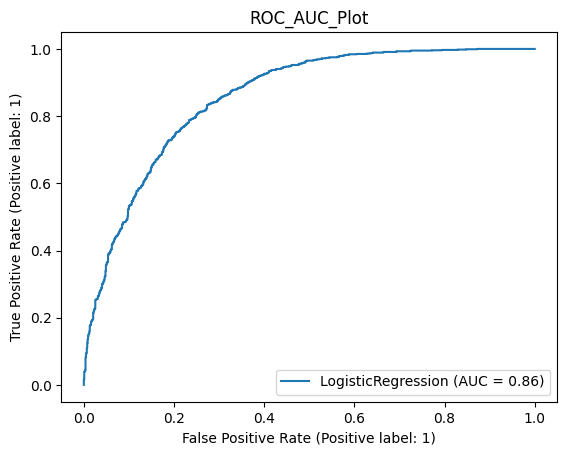

In [49]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='elasticnet', solver='saga', C=1.0, fit_intercept=True, l1_ratio=0.5)
train_model(clf,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.82      0.71      0.77      1062
           1       0.73      0.84      0.78      1004

    accuracy                           0.77      2066
   macro avg       0.78      0.78      0.77      2066
weighted avg       0.78      0.77      0.77      2066



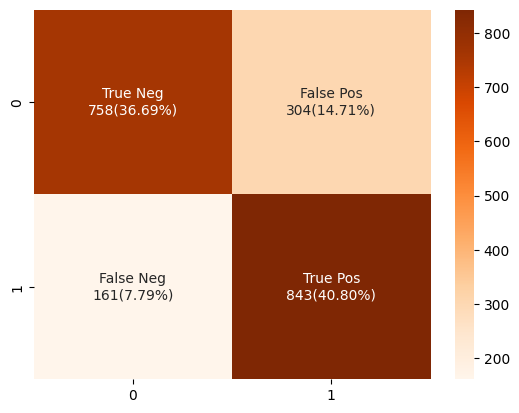

In [50]:
evaluate_model(clf,x_test,y_test)

## 2. Decision Tree

Cross Validation Score : 81.60%
ROC_AUC Score : 76.64%


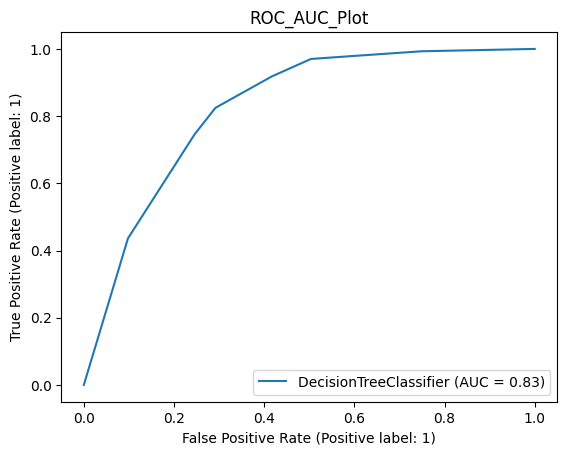

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)
train_model(clf,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.81      0.71      0.76      1062
           1       0.73      0.82      0.77      1004

    accuracy                           0.76      2066
   macro avg       0.77      0.77      0.76      2066
weighted avg       0.77      0.76      0.76      2066



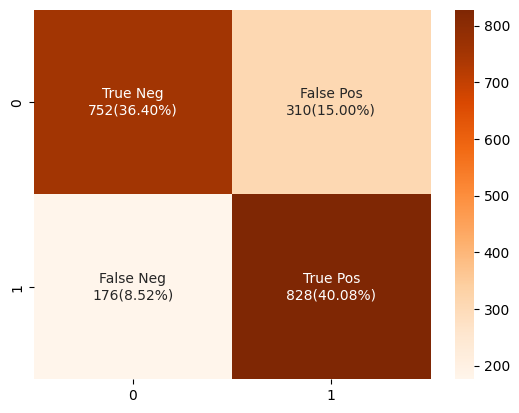

In [52]:
evaluate_model(clf,x_test,y_test)

## 3. Random Forest Classifier

Cross Validation Score : 84.77%
ROC_AUC Score : 77.89%


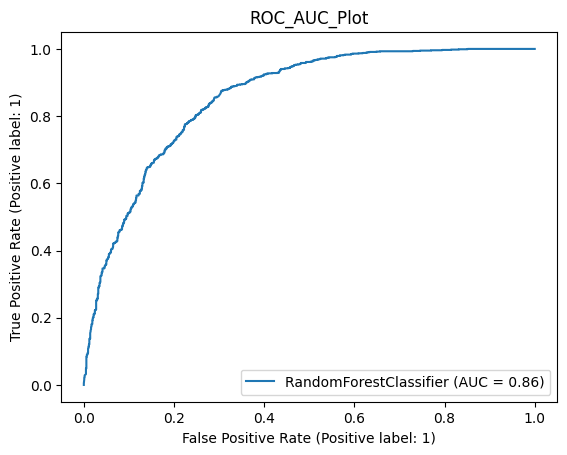

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')
train_model(clf,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1062
           1       0.74      0.84      0.78      1004

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



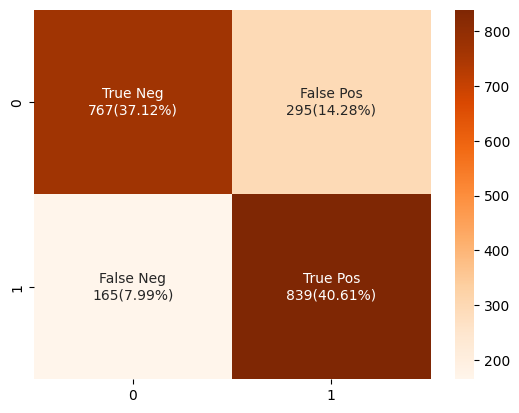

In [54]:
evaluate_model(clf,x_test,y_test)


## 4. XGBoost Classifier

Cross Validation Score : 86.74%
ROC_AUC Score : 79.50%


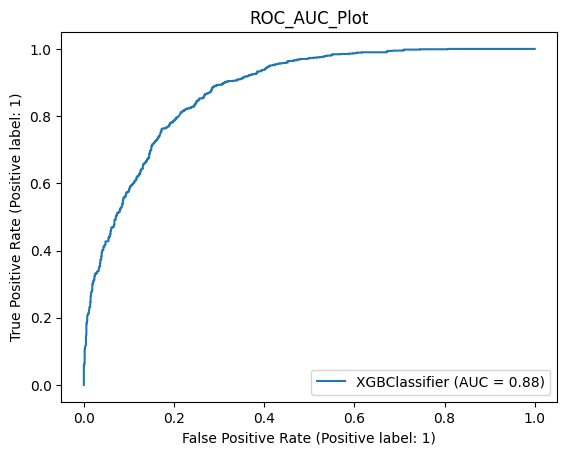

In [55]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)
train_model(classifier_xgb,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1062
           1       0.75      0.85      0.80      1004

    accuracy                           0.79      2066
   macro avg       0.80      0.79      0.79      2066
weighted avg       0.80      0.79      0.79      2066



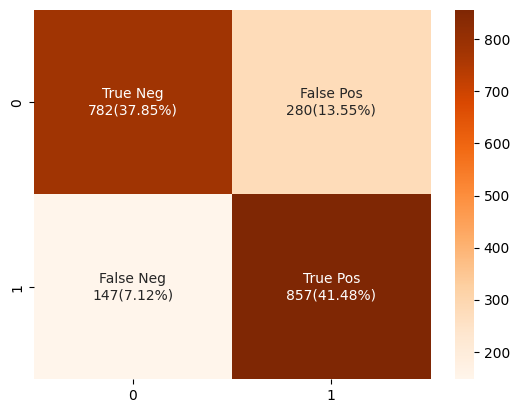

In [56]:
evaluate_model(classifier_xgb, x_test, y_test)

# Metric
### Recall 
- Critical for minimizing false negatives in customer churn prediction.
- Vital for accurately identifying individuals likely to leave.

### Primary Metric - AUC-ROC
- Widely used and effective for assessing binary classifiers.
- Particularly relevant for imbalanced datasets common in churn prediction.
- Provides comprehensive evaluation of class discrimination.
- Robust in handling imbalanced data, making it a preferred choice.

##### So, XGBoost is the optimal choice due to its highest AUC-ROC, indicating superior ability in distinguishing churn and non-churn cases, coupled with a top-performing Cross Validation Score, affirming its overall effectiveness for precise customer churn prediction in telecommunication.
So, we use grid search to further optimize the parameters of XGBoost.

In [66]:
from sklearn.model_selection import GridSearchCV
param_xgb={
    "learning_rate" : [0.1,0.3,0.6],
    "max_depth" : [3,6,8,10],
    "gamma":[0.2,0.5,1],
    "subsample" : [.9,1],
    "colsample_bytree" : [.8,1],
    "reg_lambda" : np.linspace(0.001,1,2).tolist(),
    'min_child_weight': [1, 3, 5]
}
model = XGBClassifier()
clf = GridSearchCV(model, param_xgb,cv=3,scoring='accuracy',n_jobs=-1,verbose=1)
clf = clf.fit(x_train, y_train)

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


In [68]:
best_param = clf.best_params_
print(best_param)

{'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'reg_lambda': 0.001, 'subsample': 1}


Cross Validation Score : 88.76%
ROC_AUC Score : 82.15%


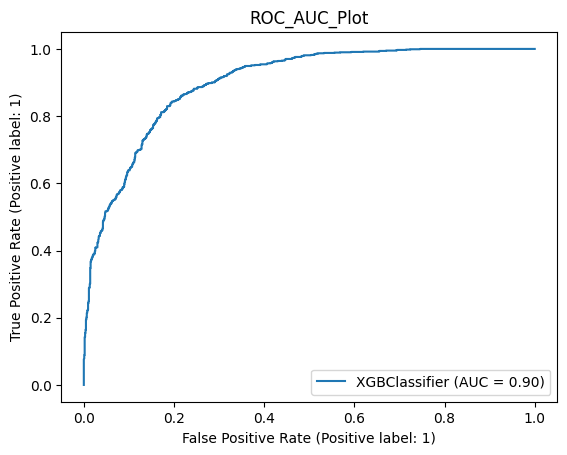

In [69]:
classifier_xgb = XGBClassifier(**best_param)
train_model(classifier_xgb,x_train,y_train,x_test,y_test)